## Машинное обучение – весна 2025
## Домашнее задание 1: Линейные модели. Работа с признаками. Классификация.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Задание 1: Линейная регрессия своими руками (4,5 балла)

В этом задании мы попробуем реализовать алгоритм линейной регрессии своими руками и рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds) и там же скачать.

In [ ]:
# можете запустить в colab этот код, чтобы скачать
! mkdir /content/data
! curl -L -o /content/data/diamonds.zip\
  https://www.kaggle.com/api/v1/datasets/download/shivam2503/diamonds
! unzip /content/data/diamonds.zip -d /content/data/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  733k  100  733k    0     0  1076k      0 --:--:-- --:--:-- --:--:-- 1076k
Archive:  /content/data/diamonds.zip
  inflating: /content/data/diamonds.csv  


In [ ]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу на примере предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 1.0 (2 балла)** Реализуйте алгоритм линейной регресии (базовой, без регуляризации)

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator

class Linreg(BaseEstimator):
    def fit(self, X, y):
        # Добавляем столбец единиц для свободного члена (intercept)
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])

        # Формула нормального уравнения: θ = (XᵀX)^(-1) Xᵀy
        self.theta_ = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_b @ self.theta_


**Задача 1.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
data.isnull().values.any()

np.False_

Пропущенных значений нет.

**Задача 1.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

Возможно, столбцы x, y, z могут не нести дополнительной информации, если есть столбец "карат".

**Задача 1.3 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

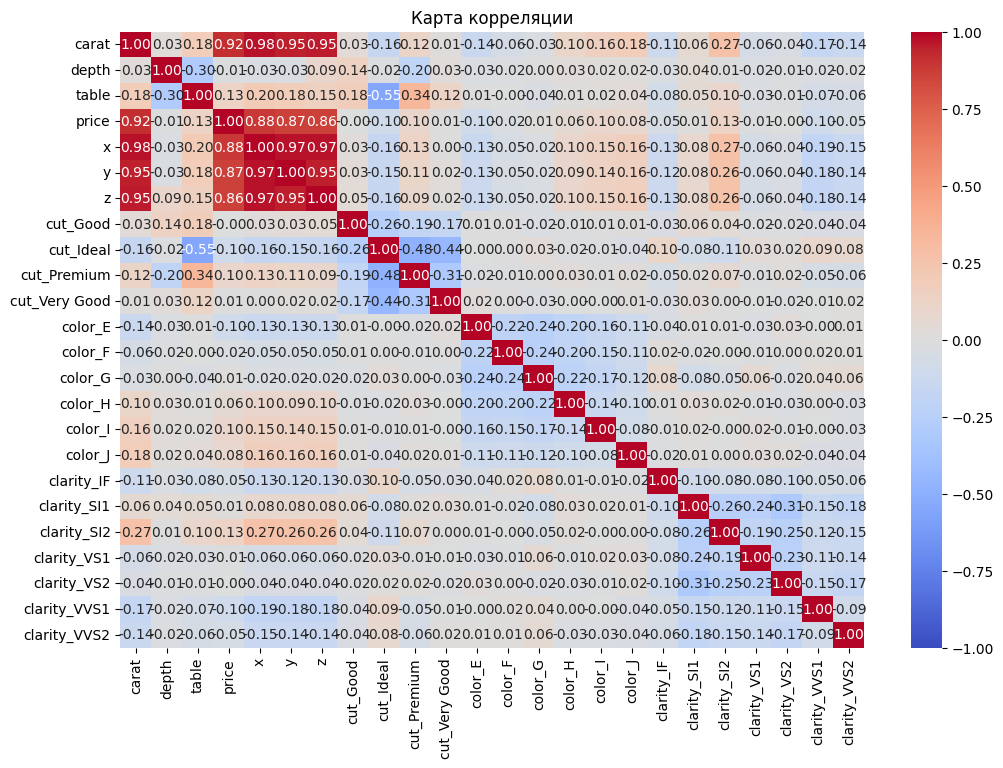

In [ ]:
import seaborn as sns

df_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Карта корреляции")
plt.show()

Больше всего с целевой переменной "price" коррелирует "carat" и "x", "y", "z".

**Задача 1.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

Сделано выше

**Задача 1.5 (0.1 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
from sklearn.model_selection import train_test_split


X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Задача 1.6 (0.1 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Инициализируем масштабировщик
scaler = StandardScaler()

# Обучаем scaler только на тренировочной выборке
X_train_scaled = scaler.fit_transform(X_train)

# Применяем те же параметры к тестовой выборке
X_test_scaled = scaler.transform(X_test)


**Задача 1.7 (0.1 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.metrics import mean_squared_error

# Обучение
model = Linreg()
model.fit(X_train_scaled, y_train)

# Предсказания
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# MSE на тренировочной и тестовой выборках
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Среднеквадратичная ошибка на тренировочной выборке:", mse_train)
print("Среднеквадратичная ошибка на тестовой выборке:", mse_test)


Среднеквадратичная ошибка на тренировочной выборке: 1290541.914745062
Среднеквадратичная ошибка на тестовой выборке: 1244765.4357158726


**Задача 1.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
from sklearn.linear_model import LinearRegression

# Модель
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Коэффициенты и признаки
coefficients = lr.coef_
features = X_train.columns

# Вывод коэффициентов с именами признаков
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")


carat: 5338.6157
depth: -90.1738
table: -60.3323
x: -1100.4189
y: -6.4589
z: -34.2589
cut_Good: 170.6029
cut_Ideal: 414.3695
cut_Premium: 339.2392
cut_Very Good: 310.6543
color_E: -83.6400
color_F: -104.5610
color_G: -202.8636
color_H: -362.0023
color_I: -442.7836
color_J: -529.4492
clarity_IF: 975.9336
clarity_SI1: 1611.5717
clarity_SI2: 1042.9212
clarity_VS1: 1670.3185
clarity_VS2: 1817.6642
clarity_VVS1: 1284.8095
clarity_VVS2: 1461.0342


In [ ]:
import numpy as np

# Модули коэффициентов
abs_coefs = np.abs(coefficients)

# Среднее значение коэффициентов
mean_coef = abs_coefs.mean()

# Признаки с коэффициентом по модулю в 2 раза больше среднего
dominant_features = [(f, c) for f, c in zip(features, coefficients) if abs(c) > 1.5 * mean_coef]

print(f"\nПризнаки с коэффициентом по модулю в 2 раза больше среднего {mean_coef:.4}")
for feature, coef in dominant_features:
    print(f"{feature}: {coef:.4f}")



Признаки с коэффициентом по модулю в 2 раза больше среднего 845.9
carat: 5338.6157
clarity_SI1: 1611.5717
clarity_VS1: 1670.3185
clarity_VS2: 1817.6642
clarity_VVS1: 1284.8095
clarity_VVS2: 1461.0342


**Задача 1.9 (0.2 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 1.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Инициализация моделей с alpha=10
lasso = Lasso(alpha=10)
ridge = Ridge(alpha=10)

# Обучение
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)


Ridge(alpha=10)

In [ ]:
from sklearn.metrics import mean_squared_error

# Предсказания
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

# Ошибки
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Lasso MSE:", mse_lasso)
print("Ridge MSE:", mse_ridge)

print("\nКоэффициенты Lasso:")
for feature, coef in zip(X_train.columns, lasso.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nКоэффициенты Ridge:")
for feature, coef in zip(X_train.columns, ridge.coef_):
    print(f"{feature}: {coef:.4f}")


Lasso MSE: 1293860.325653147
Ridge MSE: 1244573.400802614

Коэффициенты Lasso:
carat: 4831.5963
depth: -96.5169
table: -71.9379
x: -651.1852
y: -0.0000
z: -28.4948
cut_Good: 46.1360
cut_Ideal: 206.8377
cut_Premium: 151.3913
cut_Very Good: 139.2415
color_E: -12.1057
color_F: -37.3733
color_G: -123.6379
color_H: -285.7680
color_I: -368.8761
color_J: -469.2677
clarity_IF: 661.8294
clarity_SI1: 875.5659
clarity_SI2: 408.4334
clarity_VS1: 1047.8769
clarity_VS2: 1099.9089
clarity_VVS1: 848.8172
clarity_VVS2: 959.2986

Коэффициенты Ridge:
carat: 5299.3605
depth: -88.3830
table: -60.5768
x: -1057.3218
y: -9.1480
z: -37.5689
cut_Good: 171.2034
cut_Ideal: 415.4802
cut_Premium: 340.2159
cut_Very Good: 312.0161
color_E: -83.2193
color_F: -104.3869
color_G: -202.2934
color_H: -360.9978
color_I: -441.4277
color_J: -528.1307
clarity_IF: 963.3985
clarity_SI1: 1580.7206
clarity_SI2: 1016.7987
clarity_VS1: 1644.5516
clarity_VS2: 1787.7517
clarity_VVS1: 1267.1795
clarity_VVS2: 1440.4904


carat, x, y, z — геометрические характеристики — сильно коррелируют между собой (например, carat и x/z).

В базовой модели у них высокие по модулю веса (что типично при мультиколлинеарности).

Lasso обнулил y и сильно уменьшил x, z, оставив carat — это явный признак того, что они избыточны и коррелируют.

Ridge тоже слегка подавил веса геометрических признаков.



**Задача 1.10 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

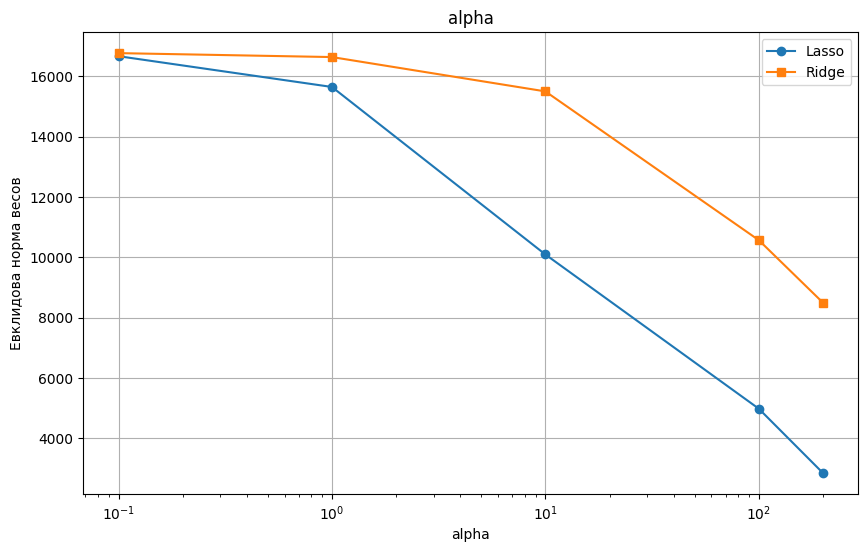

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_norms, label='Lasso', marker='o')
plt.plot(alphas, ridge_norms, label='Ridge', marker='s')
plt.xlabel('alpha')
plt.ylabel('Евклидова норма весов')
plt.title('alpha')
plt.legend()
plt.grid(True)
plt.xscale('log')  # удобно видеть при логарифмической шкале
plt.show()


**Задача 1.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV
import numpy as np

alphas = [0.1, 1, 10, 100, 200]

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Получим матрицу MSE (размер len(alphas) × cv)
mse_path = lasso_cv.mse_path_  # shape (len(alphas_), cv)
mean_mse = mse_path.mean(axis=1)

# alphas_ содержит отсортированные значения alpha, в том порядке, в каком были использованы
used_alphas = lasso_cv.alphas_

# Найдем индекс наилучшего alpha
best_index = np.argmin(mean_mse)
best_alpha = used_alphas[best_index]

# Вывод:
print("Использованные alpha:", used_alphas)
print("Средние MSE по каждому alpha:", mean_mse)
print("Лучшее значение alpha:", best_alpha)


Использованные alpha: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
Средние MSE по каждому alpha: [3925517.46441311 2630682.37262245 1544993.29858727 1298252.71384271
 1296139.46073922]
Лучшее значение alpha: 0.1


**Задача 1.12 (0.1 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
from sklearn.linear_model import Lasso

final_lasso = Lasso(alpha=0.1, max_iter=10000)
final_lasso.fit(X_train, y_train)

# Получим коэффициенты
lasso_coefs = final_lasso.coef_

# Отобразим коэффициенты с названиями признаков
coef_dict = dict(zip(X_train.columns, lasso_coefs))

# Выведем коэффициенты
for name, coef in coef_dict.items():
    print(f"{name}: {coef:.4f}")

# Отдельно выделим:
uninformative = [name for name, coef in coef_dict.items() if coef == 0]
informative = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:5]  # топ-5


carat: 11208.5795
depth: -63.7966
table: -27.4316
x: -976.2217
y: -4.9675
z: -46.3389
cut_Good: 585.1045
cut_Ideal: 835.9268
cut_Premium: 767.5702
cut_Very Good: 733.6161
color_E: -211.6604
color_F: -267.9697
color_G: -494.2790
color_H: -992.4860
color_I: -1468.8546
color_J: -2373.5863
clarity_IF: 5402.2015
clarity_SI1: 3698.8653
clarity_SI2: 2729.6268
clarity_VS1: 4603.8981
clarity_VS2: 4283.6061
clarity_VVS1: 5046.4566
clarity_VVS2: 4974.0819


Признак	Коэффициент	Интерпретация.      
carat	11208.58 - Самый важный признак — масса алмаза.  
clarity_IF	5402.20	- Высшая чистота сильно влияет на цену.   
clarity_VVS1	5046.46	Тоже очень высокая чистота.   
color_J	-2373.59	- Самый плохой цвет сильно снижает цену.   
clarity_VS1/VS2	4603–4283	Чистота очень важна.    

**Задача 1.13 (0.2 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 1.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
# Предсказания на тестовой выборке
y_pred = final_lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_test}")

MSE: 1244347.9078636083


Было: 1244765.   
Стало: 1244347.   
Хотя снижение не очень большое, оно говорит о том, что регуляризация полезна. При этом Lasso зануляет часть коэффициентов, что помогает выявить действительно важные признаки и делает модель проще и устойчивее.

### Задание 2: LR, SVM и калибровка вероятностей (5,5 балла)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#### __Задание 2.1  Сравнение методов__ (2,5 балла)





Сгенерируем синтетические данные.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

__Случайный классификатор__

Для начала зададим самую простую модель, которая на каждом объекте выдаёт случайный ответ. По тестовой выборке вычислим AUC-ROC, AUC-PR.

In [3]:
from sklearn.dummy import DummyClassifier
random_classifier = DummyClassifier(strategy='uniform', random_state=42).fit(X_train, y_train)
y_random = random_classifier.predict_proba(X_test)[:,1]
y_random

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

**Вопрос:** решаем задачу бинарной классификации, но y\_random содержит какие-то дробные числа, а не 0/1. Почему?

**Ответ**: В данном случае мы предсказываем вероятность пренадлежности к классу, а не сразу метку класса. Дальше можно установить порог (например 0.5) по которому уже будет определяться метка класса.

*Ниже приведен **пример** работы* со встроенными функциями `sklearn` для отрисовки ROC и PR кривых, сохранения метрик. Пайплайн можно изменять как вам удобно.

In [4]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

Random Classifier metrics
AUC-PR: 0.75283
AUC-ROC: 0.50000


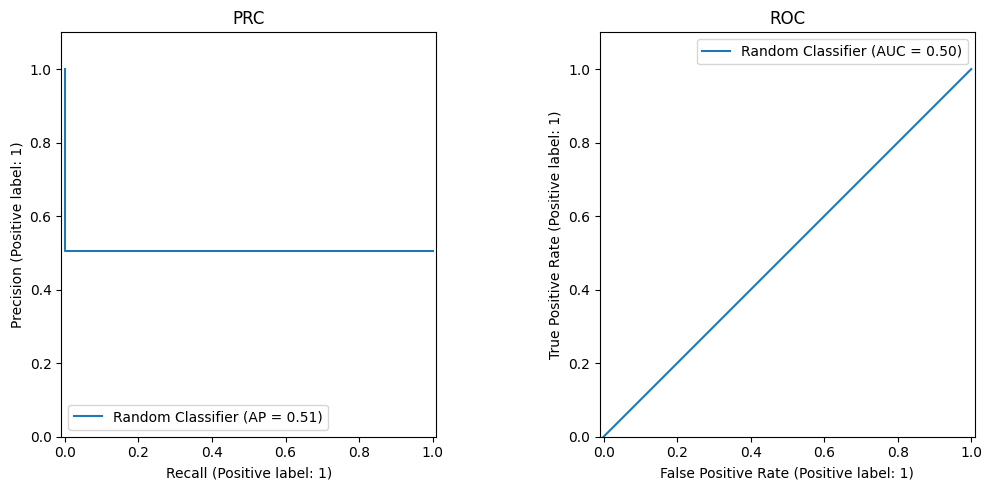

In [5]:
def depict_pr_roc(y_true, y_pred, classifier_name='Some Classifier', ax=None):
  if ax is None:
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))

  print(classifier_name, 'metrics')
  PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax[0], name=classifier_name)
  precision, recall, _ = precision_recall_curve(y_true, y_pred)
  print('AUC-PR: %.5f' % auc(recall, precision))
  ax[0].set_title("PRC")
  ax[0].set_ylim(0, 1.1)

  RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax[1], name=classifier_name)
  print('AUC-ROC: %.5f' % roc_auc_score(y_true, y_pred))
  ax[1].set_title("ROC")
  ax[1].set_ylim(0, 1.1)

  plt.tight_layout()
  plt.legend()


depict_pr_roc(y_test, y_random, 'Random Classifier')

In [6]:
df_metrics = pd.DataFrame(columns=['AUC_PR', 'AUC_ROC', 'reg_const'])
precision, recall, _ = precision_recall_curve(y_test, y_random)
df_metrics.loc['Random Classifier'] = [
      auc(recall, precision),
      roc_auc_score(y_test, y_random),
      0
]

df_metrics

,AUC_PR,AUC_ROC,reg_const
Random Classifier,0.752833,0.5,0.0


__Support Vector Machine (Linear Kernel)__

Обучите метод опорных векторов (`SVC(kernel='linear')` в `sklearn.svm`).

Подберите параметр регуляризации `C` с точки зрения AUC-PR (можете воспользоваться кросс-валидацией или отделить валидационную выборку от обучающей).


In [10]:
from cuml.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_recall_curve, auc

def auc_pr_score(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    return auc(recall, precision)


linear_svc = LinearSVC()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
scorer = make_scorer(auc_pr_score)
grid_search = GridSearchCV(linear_svc, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_linear_svc = grid_search.best_estimator_
best_c = grid_search.best_params_['C']

print("Лучшее значение параметра C:", best_c)

Лучшее значение параметра C: 0.1


  На тестовой части:
  - постройте ROC и PR кривые,
  - посчитайте AUC-ROC, AUC-PR с точностью до 5 знаков

LinearSVC metrics
AUC-PR: 0.82977
AUC-ROC: 0.84768


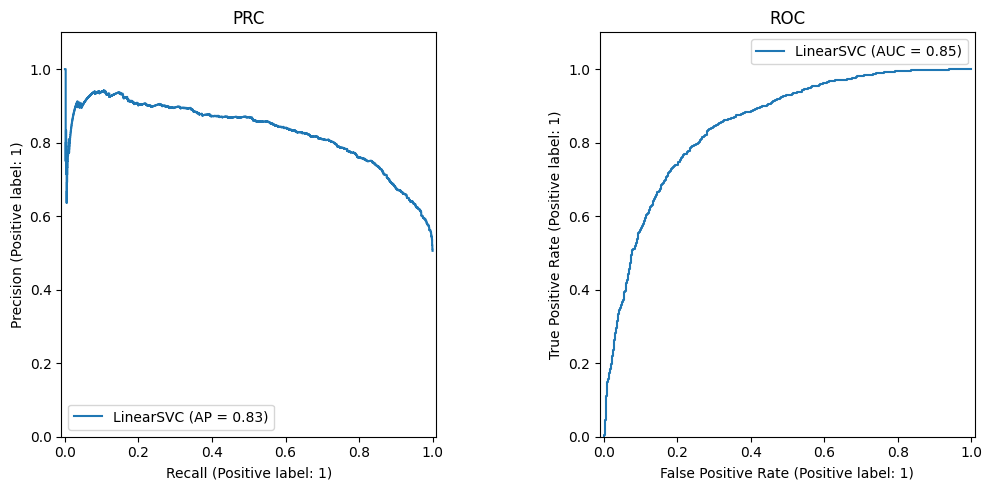

In [12]:
y_linear_svc = best_linear_svc.decision_function(X_test)
depict_pr_roc(y_test, y_linear_svc, 'LinearSVC')

Сравните AUC-ROC и AUC-PR для вашей модели с этими же метриками для случайного классификатора.

In [13]:
precision, recall, _ = precision_recall_curve(y_test, y_linear_svc)
df_metrics.loc['LinearSVC'] = [
    auc(recall, precision),
    roc_auc_score(y_test, y_linear_svc),
    best_c
]

print(df_metrics)

                     AUC_PR   AUC_ROC  reg_const
Random Classifier  0.752833  0.500000        0.0
LinearSVC          0.829770  0.847681        0.1


__Logistic Regression__


Аналогичное задание для логистической регрессии с L2 регуляризатором:


*   подберите гиперпараметр C, используя метрику AUC-PR
*   нарисуйте ROC, PR кривые для тестовой части
*   выведите метрики для тестовых данных и сравните их с результатами случайного классификатора



[2025-05-30 16:18:13.890] [CUML] [info] Unused keyword parameter: random_state during cuML estimator initialization
Лучшее значение параметра C: 0.01
Logistic Regression metrics
AUC-PR: 0.82966
AUC-ROC: 0.84759
Сравнение метрик:
                       AUC_PR   AUC_ROC  reg_const
Random Classifier    0.752833  0.500000       0.00
LinearSVC            0.829770  0.847681       0.10
Logistic Regression  0.829664  0.847588       0.01


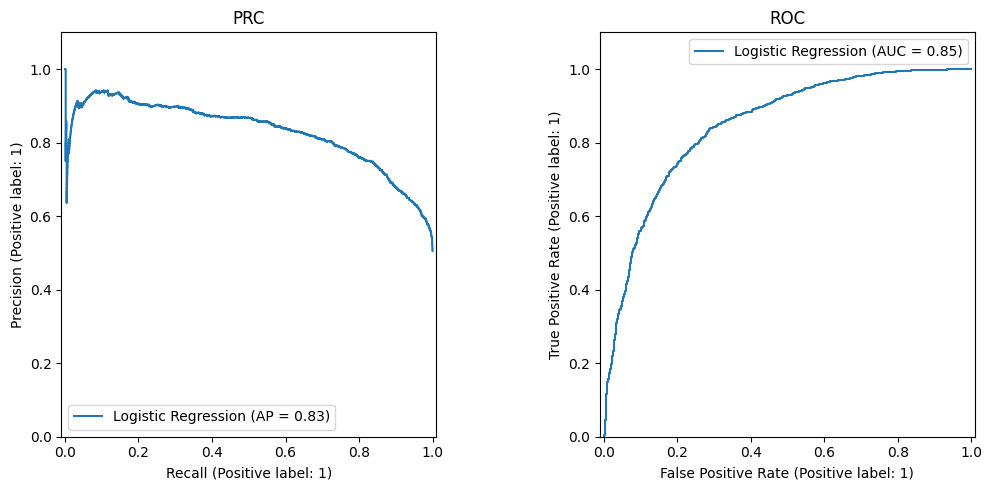

In [17]:
from cuml.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_recall_curve, auc, roc_auc_score


def auc_pr_score(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    return auc(recall, precision)


logistic_regression = LogisticRegression(penalty='l2', random_state=42)

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

scorer = make_scorer(auc_pr_score)
grid_search = GridSearchCV(logistic_regression, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_logistic_regression = grid_search.best_estimator_
best_c = grid_search.best_params_['C']

print("Лучшее значение параметра C:", best_c)


y_logistic_regression = best_logistic_regression.predict_proba(X_test)[:, 1]
depict_pr_roc(y_test, y_logistic_regression, 'Логистическая регрессия')
precision, recall, _ = precision_recall_curve(y_test, y_logistic_regression)
df_metrics.loc['Логистическая регрессия'] = [
    auc(recall, precision),
    roc_auc_score(y_test, y_logistic_regression),
    best_c
]

print("Сравнение метрик:")
print(df_metrics)

Нарисуйте ROC, PR кривые для тестовой части для всех 3 классификаторов на одном графике

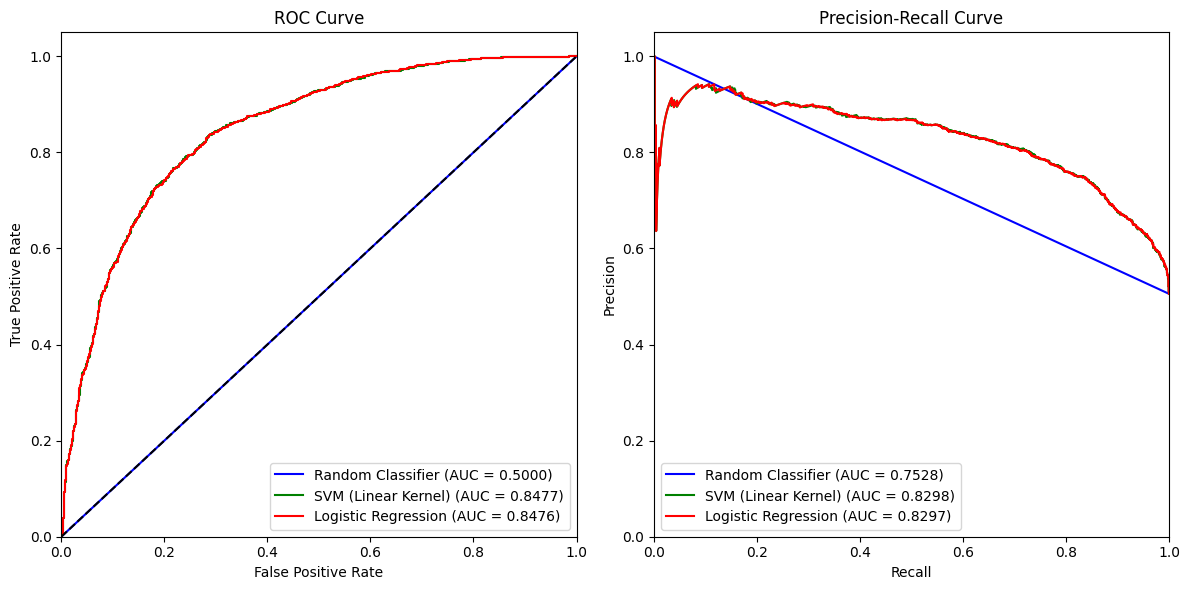

In [18]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Вычисляем ROC и PR кривые для каждого классификатора
classifiers = ['Random Classifier', 'SVM (Linear Kernel)', 'Logistic Regression']
colors = ['blue', 'green', 'red']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for classifier, color in zip(classifiers, colors):
    if classifier == 'Random Classifier':
        y_scores = y_random
    elif classifier == 'SVM (Linear Kernel)':
        y_scores = y_linear_svc
    else:
        y_scores = y_logistic_regression

    # ROC кривая
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color=color, label=f'{classifier} (AUC = {roc_auc:.4f})')

    # PR кривая
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)
    ax2.plot(recall, precision, color=color, label=f'{classifier} (AUC = {pr_auc:.4f})')

# Настройка графиков
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc='lower right')

ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc='lower left')

plt.tight_layout()
plt.show()

**Вопрос:** Сравните результаты LR и SVM с точки зрения всех вычисленных критериев качества, объясните различия (если они есть).

**Ответ:**     
AUC-PR: у SVM чуть получше, но вообще значения почти одинаковые. Значит, обе модели хорошо балансируют точность и полноту.      
     
AUC-ROC: опять же, у SVM немного повыше, но по сути одно и то же. Обе модели одинаково хорошо разделяют классы.     
      
Регуляризация (C): тут уже отличия есть. У LR значение меньше (0.01), то есть регуляризация сильнее, а у SVM больше (0.10), значит, регуляризация слабее.     
      
Почему так? Скорее всего, данные немного зашумлены, поэтому более сильная регуляризация у LR и помогает не переобучиться. А у SVM регуляризация послабее, потому что данные, видимо, неплохо разделяются и можно сделать модель посложнее без риска переобучения.     
      
Но вообще, судя по метрикам, обе модели работают примерно одинаково хорошо. Так что выбирать между ними можно исходя из других факторов: насколько понятна модель, как быстро работает или что больше нравится.      

#### __Задание 2.2 Визуализация в подходах SVM, LR__ (1 балл)



В названии метода опорных векторов присутствуют некоторые "опорные векторы". По сути, это объекты из обучающей выборки, которые задали положение разделяющей гиперплоскости.

* Сгенерируйте синтетические данные с помощью `make_classification` __с 2 признаками__, обучите на нём метод опорных векторов. Воспользуйтесь `SVC(kernel='linear')`, так как только в нём есть информация об опорных векторах, а в `LinearSVC` нет. Не забудьте зафиксировать seed для воспроизводимости

* Визуализируйте разделяющую прямую, все объекты и выделите опорные векторы (атрибут `support_vectors_`).

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

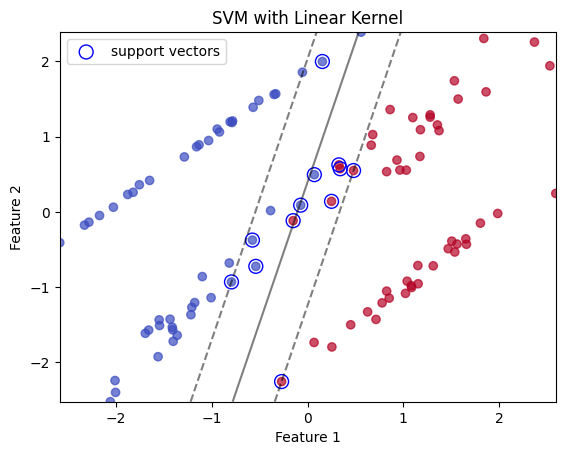

In [20]:
def plot_svm_2D(X, y, model, plot_support=True):
    xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
    yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T


    Z = model.decision_function(xy).reshape(XX.shape)

    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)

    if plot_support:
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                    label='support vectors',
                    s=100,
                    linewidth=1,
                    edgecolor="blue",
                    facecolors='none')

    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM with Linear Kernel')

plot_svm_2D(X, y, model)
plt.show()

**Вопрос:** какие объекты выделяются как "опорные"?

**Ответ:** Опорные векторы — это объекты из обучающей выборки, которые находятся вблизи разделяющей гиперплоскости и определяют ее положение. Они находятся на границе между двумя классами и являются наиболее близкими к разделяющей гиперплоскости.    
Опорные векторы выделены синим цветом и помечены значком круга. Они находятся на границе между двумя классами и определяют положение разделяющей прямой.

В отличие от метода опорных векторов, логистическая регрессия не пытается построить разделяющую гиперплоскость с максимальным отступом, а приближает в каждой точке пространства объектов вероятность положительных ответов $p(y=+1|x)$. Попробуйте нарисовать это распределение на плоскости, не забудьте отметить на ней все объекты.

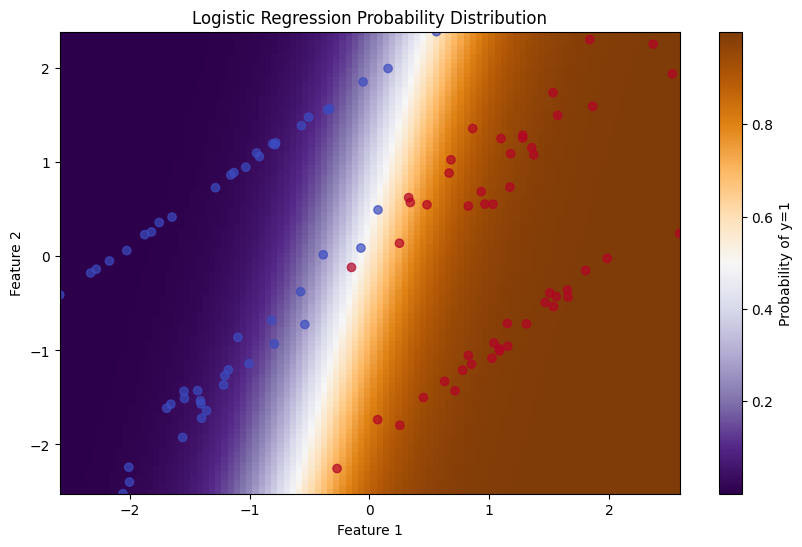

In [26]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


def plot_logreg_2D(X, y, model):

    xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    yy = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T


    Z = model.predict_proba(xy)[:, 1]
    Z = Z.reshape((xx.shape[0], -1)).T

    plt.figure(figsize=(10, 6))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)

    image = plt.imshow(Z, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)

    plt.colorbar(image, label='Вероятность y=1')

    plt.title('Распределение вероятностей логистической регрессии')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

    plt.show()


plot_logreg_2D(X, y, model)

**Вопрос:** Как на картинке визуализирована область, где модель не уверена ($p(y=+1|x) = 0.5$)? Как это обосновать теоритечески?

**Ответ:**     
На графике белая линия wx + b = 0 представляет собой границу между двумя классами. Все точки, лежащие на этой линии, имеют вероятность класса +1 равную 0.5.

#### __Задание 2.3 Калибровка вероятностей__ (2 балла)



Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность?

Хорошо откалиброванный  классификатор должен выдавать значения так, чтобы среди образцов, для которых он дал значение, близкое к $\alpha$, примерно $\alpha * 100 \%$ фактически принадлежали к положительному классу. (Например, если классификатор выдает 0.3 для некоторых, то 30% из них должны принадлежать классу 1)

Для построения калибровочной криовой используем следующий алгоритм:

Разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины.

Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной.

Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [37]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = i / n_bins
        r = (i + 1) / n_bins
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.figure(figsize=(6, 6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

Сгенерируйте синтетические данные аналогично использованным в самом первом задании. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$).

Отрисуйте калибровочную кривую идеально откалиброванной модели (диагональ)

**Внимание:** для получения вероятностей из метода опорных векторов требуется использовать формулу:

$$probas = \frac{preds - min(preds)}{max(preds) - min(preds)}$$

где $preds$ - результат работы метода decision_function

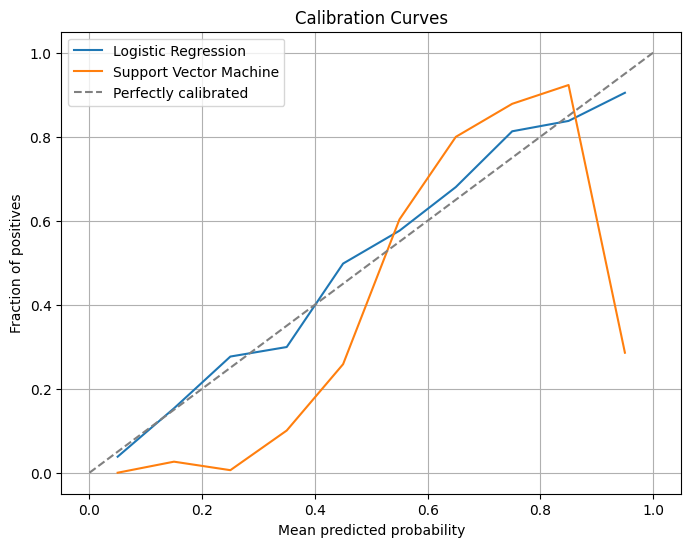

In [45]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt


X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)


svc = SVC(kernel='linear')
svc.fit(X_train, y_train)


lr_probs = lr.predict_proba(X_test)[:, 1]


svc_preds = svc.decision_function(X_test)
svc_probs = (svc_preds - svc_preds.min()) / (svc_preds.max() - svc_preds.min())

# Построение калибровочных кривых на одном графике
plt.figure(figsize=(8, 6))
plot_calibration_curve(y_test, lr_probs, label='Logistic Regression')
plot_calibration_curve(y_test, svc_probs, label='Support Vector Machine')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves')
plt.legend()
plt.grid()
plt.show()

**Вопрос**: хорошо ли откалиброваны кривые для SVM, логистической регрессии?

**Ответ:**      
Кривая SVM отклоняется от идеальной калибровки.    
Видно, что для высоких значений предсказанных вероятностей (около 0.8 и выше)
кривая SVM сходит вниз, что указывает на недостаточную калибровку.
Для низких значений предсказанных вероятностей (ниже 0.4) кривая SVM показывает завышенные вероятности.     


Изучите распределение ответов классификаторов (постройте гистограммы с помощью `plt.hist`).

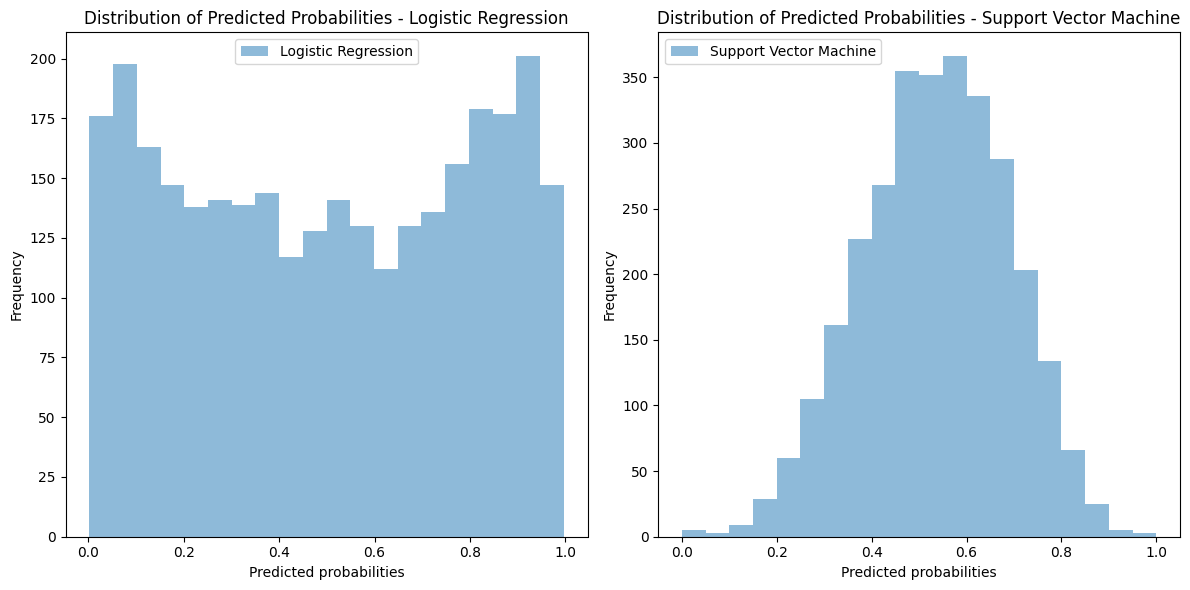

In [46]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(lr_probs, bins=20, alpha=0.5, label='Logistic Regression')
plt.xlabel('Предсказанные вероятности')
plt.ylabel('Частота')
plt.title('Распределение предсказанных вероятностей - Logistic Regression')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(svc_probs, bins=20, alpha=0.5, label='Support Vector Machine')
plt.xlabel('Предсказанные вероятности')
plt.ylabel('Частота')
plt.title('Распределение предсказанных вероятностей - Support Vector Machine')
plt.legend()

plt.tight_layout()
plt.show()

**Вопрос:** Чем они различаются? Чем вы можете объяснить это?

**Ответ:**    
Логистическая регрессия показывает более равномерное распределение вероятностей по всему диапазону от 0 до 1. Большинство предсказанных вероятностей лежат в диапазоне от 0.2 до 0.6.   
SVM сдвинутое распределение, сосредоточенное в диапазоне от 0.4 до 0.8. Это связано с стремлением SVM к ультрауверенным классификациям.    
     
Метод опорных векторов (SVM) тенденциозно стремится к классификации примеров с высокой уверенностью (вероятности близки к 0 или 1). Это связано с тем, что SVM минимизирует границу между классами и максимизирует расстояние до ближайших опорных векторов.
В результате SVM может приводить к более сдвинутому распределению вероятностей, так как он стремится принять решение как можно увереннее.     
       
Логистическая регрессия стремится к более равномерному распределению вероятностей. Это связано с тем, что логистическая регрессия минимизирует кросс-энтропию между истинными и предсказанными вероятностями.
Логистическая регрессия может привести к более равномерному распределению вероятностей, так как она не стремится к ультрауверенным классификациям.     

Воспользуйтесь `CalibratedClassifierCV` из `sklearn` для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью  предсказания для тестовой выборки.

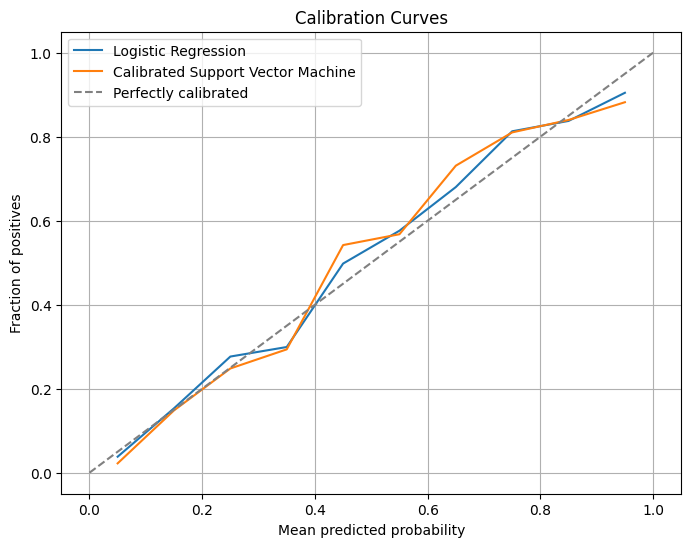

In [55]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt


X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lr = LogisticRegression()
lr.fit(X_train, y_train)


svc = SVC(kernel='linear', probability=True)
svc_calibrated = CalibratedClassifierCV(svc, cv=5, method='sigmoid')
svc_calibrated.fit(X_train, y_train)

lr_probs = lr.predict_proba(X_test)[:, 1]


svc_probs_calibrated = svc_calibrated.predict_proba(X_test)[:, 1]


plt.figure(figsize=(8, 6))
plot_calibration_curve(y_test, lr_probs, label='Logistic Regression')
plot_calibration_curve(y_test, svc_probs_calibrated, label='Calibrated Support Vector Machine')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves')
plt.legend()
plt.grid()
plt.show()

**Вопрос:** Улучшилась ли калибровочная кривая?

**Ответ:** Точно улучшилась
